
Name: Arkajyoti Chakraborty

College: Delhi Technological University(DTU)

Branch: Engineering Physics

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

Anonymized DataSource:

Here we have been provided a classified dataset that is given by any company. that means it's a type of data set where this is not specfied that whether or what is a column or something hence we are basically there to analyse the data and then we try to apply our model on that dataset and try working on it. 

In [2]:
url = 'https://raw.githubusercontent.com/ArkajyotiChakraborty/KNN/master/Classified%20Data'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Here we are Standardscaler transformation 

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors.

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler() # creating an object.
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_feature

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [6]:
# now we will creating a dataframe of this standartized data.
new_df = pd.DataFrame(scaled_feature, columns=df.columns[:-1]) # this is creating a new dataframe and then using the data of scaled_featurs that we created above and then applying columnns to it also in the col of the new data set the target value is missing as it is neglected by rn by using the scrapping the col from the original dataset.
new_df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [7]:
# now this data is a standardized data is ready to get itself nurtured in the ML models. This was mainly done because KNN mainly depends upon the distance between the data points hence we used this standardixed data set.


In [8]:
from sklearn.model_selection import train_test_split
x = new_df
y = df['TARGET CLASS'] # target value 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [9]:
# Now we are going to use the KNN algo here:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn =  KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [12]:
prediction

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[145  14]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
# The main thing about KNN is choosing the K value now we dont know what K value is going to be the right one for used and implemented in the model.

#As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
#Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

In [15]:
error_rate = [] 
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=y_test))



In [16]:
error_rate

[0.08666666666666667,
 0.09,
 0.07666666666666666,
 0.07333333333333333,
 0.08,
 0.06666666666666667,
 0.07666666666666666,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.056666666666666664,
 0.06,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.07,
 0.07333333333333333,
 0.06,
 0.06333333333333334,
 0.056666666666666664,
 0.05333333333333334,
 0.05,
 0.05,
 0.04666666666666667,
 0.05333333333333334,
 0.05,
 0.05,
 0.043333333333333335,
 0.05,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.06,
 0.06]

In [ ]:
# the above cell doesn't look good enough to config the things hence lets visuallise our way to the project.

Text(0, 0.5, 'error rate')

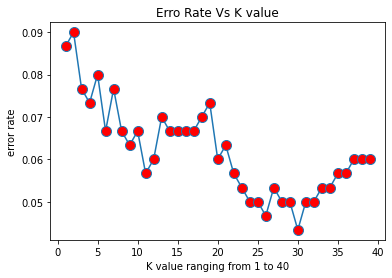

In [22]:
plt.plot(range(1,40), error_rate, marker='o',markerfacecolor = 'red',markersize = 10)
plt.title('Erro Rate Vs K value')
plt.xlabel('K value ranging from 1 to 40')
plt.ylabel('error rate')

In [28]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test,prediction))
print('/n')
print(classification_report(y_test,prediction))
# this is the best possible accuracy considering the graph.

[[153   6]
 [  7 134]]
/n
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

